In [99]:
!python -m pip install -U pip
!nltk.download(vader_lexicon)

/bin/bash: -c: line 0: syntax error near unexpected token `vader_lexicon'
/bin/bash: -c: line 0: `nltk.download(vader_lexicon)'


In [1]:
!pip install pandas
!pip install sklearn
!pip install numpy
!pip install python-binance
!pip install python-dotenv
!pip install bta-lib
!pip install matplotlib
!pip install pytrends
!pip install exporter
!pip install schedule
!pip install fuzzywuzzy

You should consider upgrading via the '/root/projects/binance_first/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/projects/binance_first/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/projects/binance_first/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/projects/binance_first/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/projects/binance_first/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/projects/binance_first/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/projects/binance_first/venv/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/root/projects/binance_first/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/projects/binance_first/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/projects/binance_first/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/projects/binance_first/venv/bin/python -m pip install --upgrade pip' command.


In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import os
import pickle
from datetime import datetime


import pandas as pd
import numpy as np
from datetime import datetime
from binance.client import Client
from binance.websockets import BinanceSocketManager
from twisted.internet import reactor
from datetime import datetime
import btalib

pd.set_option('display.max_rows', 500)

In [4]:
import logging

# Gets or creates a logger
logger = logging.getLogger(__name__)  

# set log level
logger.setLevel(logging.INFO)

# define file handler and set formatter
file_handler = logging.FileHandler('logfile.log')
formatter    = logging.Formatter('%(asctime)s : %(levelname)s : %(name)s : %(message)s')
file_handler.setFormatter(formatter)

# add file handler to logger
logger.addHandler(file_handler)

In [5]:
# init
api_key = os.environ.get('BINANCE_API')
api_secret = os.environ.get('BINANCE_SECRET')

client = Client(api_key, api_secret)

#print(client.get_account())
#print(client.get_asset_balance(asset='BTC'))
#print( client.get_symbol_ticker(symbol="DOGEUSDT"))

klines = client.get_historical_klines("DOGEUSDT", Client.KLINE_INTERVAL_1MINUTE, "1 minute ago UTC")
klines

[[1620483840000,
  '0.71796000',
  '0.71827000',
  '0.71760000',
  '0.71769000',
  '708839.70000000',
  1620483899999,
  '508896.38925400',
  687,
  '415402.20000000',
  '298242.21435100',
  '0']]

In [5]:
float([x for x in client.get_all_tickers() if x.get('symbol').startswith("BTCTRY")  ][0].get('price')) / \
float([x for x in client.get_all_tickers() if x.get('symbol').startswith("BTCUSDT")  ][0].get('price')) 


8.256746168335516

In [6]:
#coin_list_df = pd.read_csv("currency_lookup.csv")
coin_list_df = pd.read_csv("crypto_lu.csv")
coin_list_df["Symbolusd"] =  coin_list_df["Symbol"].apply(lambda x: x + "USDT" )
coin_list_df["Keywords"]  = coin_list_df.apply(lambda row: row["Name"].lower() + "," + 
                               row["Symbol"].lower() + "," + 
                               row["Symbolusd"].lower() + "," + 
                               row["Keywords"].lower()  , axis = 1)


coin_list_df = coin_list_df.head(25)

coin_list = list(coin_list_df.Symbolusd)
coin_list.append('BTCTRY')

pickle_out = open("coin_list_df.pkl","wb")
pickle.dump(coin_list_df, pickle_out)
pickle_out.close()

coin_list_df



,Name,Symbol,Keywords,Symbolusd
0,Dolar Kuru,USDTRY,"dolar kuru,usdtry,usdtryusdt,dolar",USDTRYUSDT
1,Bitcoin,BTC,"bitcoin,btc,btcusdt,xxxxxxxxxxxxxxxx",BTCUSDT
2,Ethereum,ETH,"ethereum,eth,ethusdt,xxxxxxxxxxxxxxxx",ETHUSDT
3,Binance Coin,BNB,"binance coin,bnb,bnbusdt,xxxxxxxxxxxxxxxx",BNBUSDT
4,XRP,XRP,"xrp,xrp,xrpusdt,xxxxxxxxxxxxxxxx",XRPUSDT
5,Tether,USDT,"tether,usdt,usdtusdt,xxxxxxxxxxxxxxxx",USDTUSDT
6,Cardano,ADA,"cardano,ada,adausdt,xxxxxxxxxxxxxxxx",ADAUSDT
7,Dogecoin,DOGE,"dogecoin,doge,dogeusdt,dodge coin,dogefather",DOGEUSDT
8,Polkadot,DOT,"polkadot,dot,dotusdt,xxxxxxxxxxxxxxxx",DOTUSDT
9,Uniswap,UNI,"uniswap,uni,uniusdt,xxxxxxxxxxxxxxxx",UNIUSDT


In [7]:
def f_initial_load(coinlist):

    dict_all = {}
    for coin in coin_list:  
        dict_coin = {}    
        logger.info('Initial load {x}'.format(x=coin))
        try:
            klines = client.get_historical_klines(coin, Client.KLINE_INTERVAL_4HOUR, "1 Jan, 2020", "7 May, 2021")
        except Exception as e:
            print(str(e))
            logger.error('Initial load {x} FAILED'.format(x=coin))
            continue
        for x in klines:
            ts = int(x[0]) / 1000
            dt = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
            dict_coin.update({dt:[x[0], x[4], x[5], x[8]]}) #date, price, volume, numoftrades    
        dict_all.update({coin:dict_coin})
        
    pickle_out = open("dict_all.pkl","wb")
    pickle.dump(dict_all, pickle_out)
    pickle_out.close()

    return dict_all


In [9]:
# fetch 1 minute klines for the last day up until now
def f_update_coins(coinlist, dict_all=None):
    
    if dict_all is None:
        file = open("dict_all.pkl","rb")
        dict_all = pickle.load(file)

    for coin in list(dict_all.keys()):  
        dict_coin = {}
        logger.info('try to update coin {x}'.format(x=coin))
        
        try:
            klines = client.get_historical_klines(coin, Client.KLINE_INTERVAL_4HOUR, "2 day ago UTC")
        except Exception as e:
            print(str(e))
            logger.error('UPDATE list of coin: {x} FAILED, seems no info'.format(x=coin))
            ##Make warning to say that such coin data is not up-to-date!!
            continue        
        dict_coin = dict_all.get(coin)
        for x in klines:
            ts = int(x[0]) / 1000
            dt = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
            dict_coin.update({dt:[x[0], x[4], x[5], x[8]]}) #date, price, volume, numoftrades    
        dict_all.update({coin:dict_coin})
    pickle_out = open("dict_all.pkl","wb")
    pickle.dump(dict_all, pickle_out)
    pickle_out.close()

    return dict_all


In [10]:
# fetch 1 minute klines for the last day up until now
def f_update_lastprice(coinlist, dict_all=None):
    
    if dict_all is None:
        file = open("dict_all.pkl","rb")
        dict_all = pickle.load(file)

    for coin in list(dict_all.keys()):  
        dict_coin = {}
        logger.info('try to update coin {x}'.format(x=coin))
        
        try:
            client.get_historical_klines(coin, Client.KLINE_INTERVAL_1MINUTE, "1 minute ago UTC")
        except Exception as e:
            print(str(e))
            logger.error('UPDATE list of coin: {x} FAILED, seems no info'.format(x=coin))
            ##Make warning to say that such coin data is not up-to-date!!
            continue        
        dict_coin = dict_all.get(coin)
        for x in klines:
            ts = int(x[0]) / 1000
            dt = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
            dict_coin.update({dt:[x[0], x[4], x[5], x[8]]}) #date, price, volume, numoftrades    
        dict_all.update({coin:dict_coin})
    pickle_out = open("dict_all.pkl","wb")
    pickle.dump(dict_all, pickle_out)
    pickle_out.close()

    return dict_all

In [11]:
dict_all_coins = f_initial_load(coin_list)

APIError(code=-1121): Invalid symbol.
APIError(code=-1121): Invalid symbol.
APIError(code=-1121): Invalid symbol.


In [12]:
#dict_all_coins = f_update_coins(coin_list, dict_all_coins)
dict_all_coins = f_update_coins(coin_list, dict_all = None)
dict_all_coins = f_update_lastprice(coin_list, dict_all = None)


In [13]:
for key in dict_all_coins.get( "DOGEUSDT").keys():
    print(key)

2020-01-01 00:00:00
2020-01-01 04:00:00
2020-01-01 08:00:00
2020-01-01 12:00:00
2020-01-01 16:00:00
2020-01-01 20:00:00
2020-01-02 00:00:00
2020-01-02 04:00:00
2020-01-02 08:00:00
2020-01-02 12:00:00
2020-01-02 16:00:00
2020-01-02 20:00:00
2020-01-03 00:00:00
2020-01-03 04:00:00
2020-01-03 08:00:00
2020-01-03 12:00:00
2020-01-03 16:00:00
2020-01-03 20:00:00
2020-01-04 00:00:00
2020-01-04 04:00:00
2020-01-04 08:00:00
2020-01-04 12:00:00
2020-01-04 16:00:00
2020-01-04 20:00:00
2020-01-05 00:00:00
2020-01-05 04:00:00
2020-01-05 08:00:00
2020-01-05 12:00:00
2020-01-05 16:00:00
2020-01-05 20:00:00
2020-01-06 00:00:00
2020-01-06 04:00:00
2020-01-06 08:00:00
2020-01-06 12:00:00
2020-01-06 16:00:00
2020-01-06 20:00:00
2020-01-07 00:00:00
2020-01-07 04:00:00
2020-01-07 08:00:00
2020-01-07 12:00:00
2020-01-07 16:00:00
2020-01-07 20:00:00
2020-01-08 00:00:00
2020-01-08 04:00:00
2020-01-08 08:00:00
2020-01-08 12:00:00
2020-01-08 16:00:00
2020-01-08 20:00:00
2020-01-09 00:00:00
2020-01-09 04:00:00


2021-04-28 20:00:00
2021-04-29 00:00:00
2021-04-29 04:00:00
2021-04-29 08:00:00
2021-04-29 12:00:00
2021-04-29 16:00:00
2021-04-29 20:00:00
2021-04-30 00:00:00
2021-04-30 04:00:00
2021-04-30 08:00:00
2021-04-30 12:00:00
2021-04-30 16:00:00
2021-04-30 20:00:00
2021-05-01 00:00:00
2021-05-01 04:00:00
2021-05-01 08:00:00
2021-05-01 12:00:00
2021-05-01 16:00:00
2021-05-01 20:00:00
2021-05-02 00:00:00
2021-05-02 04:00:00
2021-05-02 08:00:00
2021-05-02 12:00:00
2021-05-02 16:00:00
2021-05-02 20:00:00
2021-05-03 00:00:00
2021-05-03 04:00:00
2021-05-03 08:00:00
2021-05-03 12:00:00
2021-05-03 16:00:00
2021-05-03 20:00:00
2021-05-04 00:00:00
2021-05-04 04:00:00
2021-05-04 08:00:00
2021-05-04 12:00:00
2021-05-04 16:00:00
2021-05-04 20:00:00
2021-05-05 00:00:00
2021-05-05 04:00:00
2021-05-05 08:00:00
2021-05-05 12:00:00
2021-05-05 16:00:00
2021-05-05 20:00:00
2021-05-06 00:00:00
2021-05-06 04:00:00
2021-05-06 08:00:00
2021-05-06 12:00:00
2021-05-06 16:00:00
2021-05-06 20:00:00
2021-05-07 00:00:00


In [14]:
df_all_coins = pd.DataFrame(columns= ["coin", "dt", "price", "vol", "tradefreq"])
for coin in dict_all_coins.keys():
    dict_coin = dict_all_coins.get(coin)
    listx = []
    for dt in dict_coin.keys():
        listx.append([coin, dt, dict_coin.get(dt)[1], dict_coin.get(dt)[2], dict_coin.get(dt)[3]])
    df_all_coins = df_all_coins.append(pd.DataFrame(data = listx,
                                     columns= ["coin", "dt", "price", "vol", "tradefreq"]
                                    )
                       )
df_all_coins.dt = df_all_coins.dt.apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')  )

df_all_coins['last_time'] = 0
for coin in df_all_coins.coin.unique():
    max_dt = np.max(df_all_coins.loc[df_all_coins.coin == coin, 'dt'])
    df_all_coins.loc[(df_all_coins.coin == coin) & (df_all_coins.dt == max_dt ) , 'last_time'] = 1

df_all_coins.set_index("dt", drop=True, inplace = True )
df_all_coins.sort_index(inplace=True)
df_all_coins["is_day_end"] = 0
df_all_coins.loc[[True if x.strftime("%H:%M:%S") == '00:00:00' else False for x in list(df_all_coins.index)], "is_day_end"] = 1  
df_all_coins.price = df_all_coins.price.astype(float)
df_all_coins.tradefreq= df_all_coins.tradefreq.astype(float)
df_all_coins.vol= df_all_coins.vol.astype(float)
df_all_coins.tail()




,coin,price,vol,tradefreq,last_time,is_day_end
dt,,,,,,
2021-05-08 10:59:00,ADAUSDT,0.70534,188412.2,267.0,1,0
2021-05-08 10:59:00,XMRUSDT,0.70534,188412.2,267.0,1,0
2021-05-08 10:59:00,XLMUSDT,0.70534,188412.2,267.0,1,0
2021-05-08 10:59:00,VETUSDT,0.70534,188412.2,267.0,1,0
2021-05-08 10:59:00,BTCTRY,0.70534,188412.2,267.0,1,0


In [9]:
df_all_coins

,coin,price,vol,tradefreq,last_time,is_day_end
dt,,,,,,
2020-01-01 00:00:00,BTCUSDT,7177.02000,5.118149e+02,7640.0,0,1
2020-01-01 00:00:00,BUSDUSDT,1.00370,1.347812e+04,122.0,0,1
2020-01-01 00:00:00,ETHUSDT,128.87000,7.769173e+03,2504.0,0,1
2020-01-01 00:00:00,XMRUSDT,44.57000,1.017441e+03,170.0,0,1
2020-01-01 00:00:00,TRXUSDT,0.01324,3.633460e+07,616.0,0,1
...,...,...,...,...,...,...
2021-05-04 17:00:00,DOTUSDT,35.39500,5.634986e+05,24132.0,1,0
2021-05-04 17:00:00,DOGEUSDT,0.56896,9.162416e+08,412411.0,1,0
2021-05-04 17:00:00,XRPUSDT,1.39130,5.274995e+07,66930.0,1,0


In [15]:
df_all_coins["next1price"] = df_all_coins.groupby(['coin'])['price'].shift(-4)
df_all_coins["next2price"] = df_all_coins.groupby(['coin'])['price'].shift(-8)
df_all_coins["next3price"] = df_all_coins.groupby(['coin'])['price'].shift(-12)

df_all_coins["Target"] = 0

def set_target(row, margin):
    meanx = np.nanmean([row["next1price"], row["next2price"], row["next3price"] ])
    if meanx > row["price"] * (1.00 + margin):
        return 1
    elif meanx < row["price"] * (1.00 - margin):
        return -1
    else:
        return 0

    
def set_target_numeric(row):
    return np.nanmean([row["next1price"], row["next2price"], row["next3price"] ])
        
Target_Type = 'Binary'
    
if Target_Type == 'Numeric':    
    #Numeric Target
    df_all_coins.loc[df_all_coins.last_time == 0, "Target"] = \
            df_all_coins.loc[df_all_coins.last_time == 0, :].apply(lambda row: set_target_numeric(row), axis = 1)    
else:
    #Binary Target
    df_all_coins.loc[df_all_coins.last_time == 0, "Target"] = \
            df_all_coins.loc[df_all_coins.last_time == 0, :].apply(lambda row: set_target(row, 0.02), axis = 1)


    

/root/projects/binance_first/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [16]:
for coin in df_all_coins.coin.unique():
    index_t = (df_all_coins.coin == coin)
    #df_all_coins.loc[index_t, 'ma12'] = btalib.sma(df_all_coins.loc[index_t, 'price'], period=12).df.values.tolist()
    #df_all_coins.loc[index_t, 'ma24'] = btalib.sma(df_all_coins.loc[index_t, 'price'], period=24).df.values.tolist()
    #df_all_coins.loc[index_t, 'ma48'] = btalib.sma(df_all_coins.loc[index_t, 'price'], period=48).df.values.tolist()
    #df_all_coins.loc[index_t, 'ma148'] = btalib.sma(df_all_coins.loc[index_t, 'price'], period=96).df.values.tolist()
    df_all_coins.loc[index_t, 'rsi14'] = btalib.rsi(df_all_coins.loc[index_t, 'price'], period=14).df.values.tolist()
    df_all_coins.loc[index_t, 'rsi28'] = btalib.rsi(df_all_coins.loc[index_t, 'price'], period=28).df.values.tolist()
    df_all_coins.loc[index_t, 'rsi42'] = btalib.rsi(df_all_coins.loc[index_t, 'price'], period=42).df.values.tolist()
    #df_all_coins.loc[index_t, 'rsi48'] = btalib.rsi(df_all_coins.loc[index_t, 'price'], period=48).df.values.tolist()
    df_all_coins.loc[index_t, 'rsi72'] = btalib.rsi(df_all_coins.loc[index_t, 'price'], period=72).df.values.tolist()
    df_all_coins.loc[index_t, ["macd12", "signal12", "hist12"] ] =  \
                    btalib.macd(df_all_coins.loc[index_t, 'price'], pfast=12, pslow=24, psignal=9).df.values.tolist()
    df_all_coins.loc[index_t, ["macd6", "signal6", "hist6"] ] =  \
                    btalib.macd(df_all_coins.loc[index_t, 'price'], pfast=6, pslow=12, psignal=4).df.values.tolist()

#df_all_coins['ma12_24_diff'] = df_all_coins['ma12'] - df_all_coins['ma24']
df_all_coins['macd12_ratio'] = df_all_coins['macd12'] / df_all_coins['price']
df_all_coins['macd6_ratio'] = df_all_coins['macd6'] / df_all_coins['price']


df_all_coins.loc[df_all_coins.coin == 'DOGEUSDT', :].Target.value_counts()
#df_all_coins.columns


 0    1440
 1     853
-1     668
Name: Target, dtype: int64

In [17]:
df_all_coins.loc[df_all_coins.coin == 'DOGEUSDT', :].tail(100)

,coin,price,vol,tradefreq,last_time,is_day_end,next1price,next2price,next3price,Target,...,rsi42,rsi72,macd12,signal12,hist12,macd6,signal6,hist6,macd12_ratio,macd6_ratio
dt,,,,,,,,,,,,,,,,,,,,,
2021-04-22 00:00:00,DOGEUSDT,0.273568,1.718344e+09,488682.0,0,1,0.273938,0.242115,0.242983,-1,...,53.617514,55.967709,0.000057,0.013282,-0.013225,-0.015512,-0.012828,-0.002684,0.000209,-0.056702
2021-04-22 04:00:00,DOGEUSDT,0.278130,1.285406e+09,355107.0,0,0,0.260661,0.234948,0.272429,-1,...,53.950327,56.212252,-0.002924,0.010041,-0.012966,-0.016396,-0.014255,-0.002141,-0.010515,-0.058951
2021-04-22 08:00:00,DOGEUSDT,0.263679,1.995050e+09,557196.0,0,0,0.215858,0.241800,0.263858,-1,...,52.722626,55.226898,-0.006277,0.006778,-0.013054,-0.018115,-0.015799,-0.002316,-0.023804,-0.068702
2021-04-22 12:00:00,DOGEUSDT,0.292564,2.620284e+09,715542.0,0,0,0.211918,0.249815,0.275161,-1,...,54.827493,56.763196,-0.006676,0.004087,-0.010763,-0.014549,-0.015299,0.000750,-0.022819,-0.049730
2021-04-22 16:00:00,DOGEUSDT,0.273938,1.995751e+09,558298.0,0,0,0.242115,0.242983,0.279583,-1,...,53.261112,55.517498,-0.008280,0.001613,-0.009894,-0.014210,-0.014864,0.000653,-0.030226,-0.051875
2021-04-22 20:00:00,DOGEUSDT,0.260661,1.584287e+09,407808.0,0,0,0.234948,0.272429,0.270000,0,...,52.172792,54.650610,-0.010407,-0.000791,-0.009617,-0.015132,-0.014971,-0.000161,-0.039926,-0.058052
2021-04-23 00:00:00,DOGEUSDT,0.215858,6.106601e+09,1065537.0,0,1,0.241800,0.263858,0.274577,1,...,48.730515,51.878394,-0.015244,-0.003681,-0.011562,-0.020932,-0.017355,-0.003576,-0.070619,-0.096970
2021-04-23 04:00:00,DOGEUSDT,0.211918,3.199475e+09,649260.0,0,0,0.249815,0.275161,0.276545,1,...,48.442575,51.644758,-0.019112,-0.006767,-0.012345,-0.024037,-0.020028,-0.004009,-0.090186,-0.113424
2021-04-23 08:00:00,DOGEUSDT,0.242115,3.465052e+09,711387.0,0,0,0.242983,0.279583,0.271460,1,...,50.728237,53.279985,-0.019658,-0.009346,-0.010313,-0.020875,-0.020367,-0.000508,-0.081194,-0.086218


## Classification

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.svm import SVC


list_all = []
#for coin in df_all_coins.coin.unique():
for coin in ['DOGEUSDT']: #DOGEUSDT, LUNAUSDT, XRPUSDT,UNIUSDT, FILUSDT
    

    

    #df_tmp = df_all_coins.copy()
    df_tmp = df_all_coins.loc[df_all_coins.coin==coin, : ]
    #df_tmp = df_all_coins.loc[(df_all_coins.coin==coin) & (df_all_coins.Target != 0), : ]
    df_tmp.dropna(inplace = True)
    y = df_tmp.loc[:, ["Target"]]
    X = df_tmp.loc[:, [ x for x in df_tmp.columns if x not in (["Target" 
                                                                ,"coin" 
                                                                ,"next1price" 
                                                                ,"next2price" 
                                                                ,"next3price" 
                                                                ,"price"
                                                               # ,"is_day_end"
                                                               # ,"last_time"
                                                               ])  ]]

    df_tmp.loc[:, ["Target"]]
    
    clf = RandomForestClassifier(n_estimators=10 ,random_state=0, max_depth = 5, class_weight = "balanced")
    #clf.fit(X , y)
    clf = OneVsRestClassifier(clf).fit(X, y)
    
    y_pred = clf.predict(X)
    print(classification_report(y, y_pred))
    print(confusion_matrix(y, y_pred))
    list_all.append([coin, 
                     f1_score(y, y_pred, average='macro'),
                     f1_score(y, df_tmp["macd12"].apply(lambda x: 1 if x > 0.01 else  (-1 if x < -0.01 else 0 ) ), average='macro')])
    
    del df_tmp
    
    print(coin)
    #graph for feature importance

    #from sklearn.metrics import f1_score
    #f1_score(y, y_pred, average='macro')    
    print('**********************')
    
    #print(coin + " - " +  str(f1_score(y, y_pred, average='macro')))
pd.DataFrame(data = list_all, columns = ["coin", "model", "baseline"]).sort_values(by="model", ascending = False)    

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

#plt.barh(X.columns, clf.feature_importances_)



              precision    recall  f1-score   support

          -1       0.67      0.54      0.60       664
           0       0.71      0.84      0.77      1392
           1       0.68      0.56      0.62       821

    accuracy                           0.69      2877
   macro avg       0.69      0.65      0.66      2877
weighted avg       0.69      0.69      0.69      2877

[[ 361  219   84]
 [  90 1172  130]
 [  89  269  463]]
DOGEUSDT
**********************


In [89]:
def f_temp(x, thr):
    if x >= thr:
        return 1
    elif x <= 1- thr:
        return -1
    else:
        return 0


def f_temp3(x, thr):
    if x[0] >= thr:
        return -1
    elif x[1] >= thr:
        return 0
    elif x[2] >= thr:
        return 1
    else:
        return -99    
    
    
def f_classif_report(clf, X, y, thr = 0.5):
    orig_len = len(X)
    
    if len(clf.predict_proba(X)[0]) == 3:
        y_pred = [f_temp3(x, thr) for x in clf.predict_proba(X)]
        np_array = np.array(y_pred)
        item_index = np.where((np_array==-1) | (np_array==1) | (np_array==0) )
        item_index = list(item_index[0])
        y_pred = [y_pred[x] for x  in item_index ]
        y_list = [x[0] for x in  y.values]
        y = [y_list[x] for x  in item_index ]
    elif len(clf.predict_proba(X)[0]) == 2:
        y_pred = [f_temp(x[1], thr) for x in clf.predict_proba(X)]
        np_array = np.array(y_pred)
        item_index = np.where((np_array==-1) | (np_array==1) )
        item_index = list(item_index[0])
        y_pred = [y_pred[x] for x  in item_index ]
        y_list = [x[0] for x in  y.values]
        y = [y_list[x] for x  in item_index ]
    
    last_len = len(y)
    
    print("Lost on dataset: {x}".format(x = 1 - (last_len/orig_len) ) )  
    print(classification_report(y, y_pred))
    print(confusion_matrix(y, y_pred))




In [99]:
f_classif_report(clf, X, y, thr = 0.5)

Lost on dataset: 0.5637817170663886
              precision    recall  f1-score   support

          -1       0.83      0.72      0.77       276
           0       0.80      0.96      0.87       628
           1       0.90      0.68      0.77       351

    accuracy                           0.83      1255
   macro avg       0.84      0.78      0.80      1255
weighted avg       0.83      0.83      0.82      1255

[[198  66  12]
 [ 13 601  14]
 [ 27  87 237]]


In [92]:
clf.predict_proba(X)

array([[0.44959922, 0.16396759, 0.38643319],
       [0.52084813, 0.13352663, 0.34562524],
       [0.50697402, 0.15186662, 0.34115936],
       ...,
       [0.37644133, 0.32157376, 0.3019849 ],
       [0.34206328, 0.32633057, 0.33160616],
       [0.36999119, 0.27067042, 0.35933839]])

In [37]:
y_pred

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [25]:
    df_tmp = df_all_coins.loc[df_all_coins.coin ==coin, : ]
    df_tmp.dropna(inplace = True)
df_tmp["macd12"].apply(lambda x: 1 if x > 0 else  (-1 if x < 0 else 0 ) )

dt
2020-10-17 16:00:00   -1
2020-10-17 17:00:00   -1
2020-10-17 18:00:00   -1
2020-10-17 19:00:00   -1
2020-10-17 20:00:00   -1
                      ..
2021-04-23 11:00:00   -1
2021-04-23 12:00:00   -1
2021-04-23 13:00:00   -1
2021-04-23 14:00:00   -1
2021-04-23 15:00:00   -1
Name: macd12, Length: 4503, dtype: int64

## Regression

In [15]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")


list_all = []
for coin in df_all_coins.coin.unique():

    clf = RandomForestRegressor(n_estimators=10 ,random_state=0, max_depth = 10)

    #df_tmp = df_all_coins.copy()
    df_tmp = df_all_coins.loc[df_all_coins.coin ==coin, : ]
    df_tmp.dropna(inplace = True)
    y = df_tmp.loc[:, ["Target"]]
    X = df_tmp.loc[:, [ x for x in df_tmp.columns if x not in (["Target", "coin", "next1price", "next2price", "next3price"])  ]]

    clf.fit(X , y)
    y_pred = clf.predict(X)
    #print(classification_report(y, y_pred))
    #print(confusion_matrix(y, y_pred))
    list_all.append([coin, r2_score(y, y_pred), r2_score(y, df_tmp.loc[:, ["ma12"]])  ])
    #print(coin + " - " +  str(f1_score(y, y_pred, average='macro')))
    
    del df_tmp
    
pd.DataFrame(data = list_all, columns = ["coin", "MODEL", "BASELINE"]).sort_values(by="MODEL", ascending = False)    


,coin,MODEL,BASELINE
1,BNBUSDT,0.999763,0.994814
4,ADAUSDT,0.999691,0.996443
13,THETAUSDT,0.999680,0.994976
9,VETUSDT,0.999625,0.990931
19,FILUSDT,0.999594,0.986912
14,DOGEUSDT,0.999581,0.963134
16,SOLUSDT,0.999572,0.992597
17,DOTUSDT,0.999481,0.994226
0,ETHUSDT,0.999420,0.996216
11,LINKUSDT,0.999358,0.995555


<BarContainer object of 14 artists>

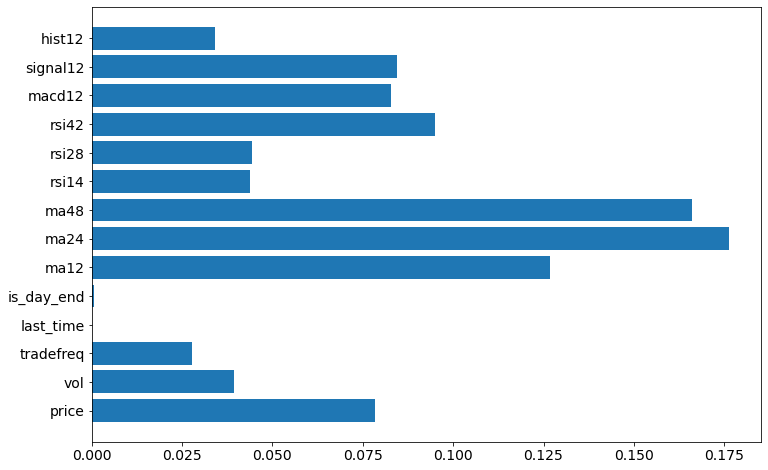

In [22]:
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

plt.barh(X.columns, clf.feature_importances_)


#from sklearn.metrics import f1_score
#f1_score(y, y_pred, average='macro')

In [150]:
index_t = (df_all_coins.coin == 'DOGEUSDT')
df_all_coins.loc[index_t, :]
btalib.sma(df_all_coins.loc[index_t, 'price'], period=48).df.values.tolist()    
#btalib.sma(df_all_coins.loc[index_t, 'price'], period=48).df  


[[nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [0.0036205083333333333],
 [0.003611364583333333],
 [0.0036038479166666665],
 [0.0035965687499999997],
 [0.00359078125],
 [0.0035864833333333333],
 [0.003586008333333333],
 [0.0035836541666666665],
 [0.0035806916666666663],
 [0.0035774104166666665],
 [0.003574385416666667],
 [0.0035699208333333336],
 [0.003562995833333334],
 [0.0035569958333333336],
 [0.0035526875000000003],
 [0.0035481604166666667],
 [0.0035422770833333336],
 [0.0035369562500000007],
 [0.003532212500000001],
 [0.0035285625000000004],
 [0.003524583333333334],
 [0.003522083333333334],
 [0.003519427083333334],
 [0.003517227083333334],
 [0.0035154333333

In [141]:
df_all_coins.loc[df_all_coins.coin == 'DOGEUSDT', :].head(100)

,coin,price,vol,tradefreq,last_time,is_day_end,next1price,next2price,Target,ma48
dt,,,,,,,,,,
2019-07-05 12:00:00,DOGEUSDT,0.003925,949430724.0,6487.0,0,0,0.003640,0.003819,0,NaN
2019-07-05 13:00:00,DOGEUSDT,0.003835,159004267.0,1529.0,0,0,0.003688,0.003747,0,NaN
2019-07-05 14:00:00,DOGEUSDT,0.003841,105517060.0,1241.0,0,0,0.003711,0.003740,0,NaN
2019-07-05 15:00:00,DOGEUSDT,0.003738,100804728.0,1213.0,0,0,0.003710,0.003767,0,NaN
2019-07-05 16:00:00,DOGEUSDT,0.003666,120261079.0,1416.0,0,0,0.003743,0.003745,0,NaN
2019-07-05 17:00:00,DOGEUSDT,0.003628,148274922.0,1624.0,0,0,0.003870,0.003707,0,NaN
2019-07-05 18:00:00,DOGEUSDT,0.003640,58947455.0,820.0,0,0,0.003819,0.003641,0,NaN
2019-07-05 19:00:00,DOGEUSDT,0.003688,73100952.0,974.0,0,0,0.003747,0.003660,0,NaN
2019-07-05 20:00:00,DOGEUSDT,0.003711,42377075.0,770.0,0,0,0.003740,0.003619,0,NaN


In [7]:
# valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M

# get timestamp of earliest date data is available
timestamp = client._get_earliest_valid_timestamp('DOGEUSDT', '1d')

# request historical candle (or klines) data
klines = client.get_historical_klines("DOGEUSDT", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")

In [ ]:
timestamp = client._get_earliest_valid_timestamp('BTCUSDT', '1d')
timestamp

In [10]:
klines[-1]




[1618685700000,
 '0.27480000',
 '0.27489960',
 '0.27414070',
 '0.27449730',
 '832363.00000000',
 1618685759999,
 '228516.22384700',
 318,
 '363595.00000000',
 '99811.79834750',
 '0']

In [21]:
from datetime import datetime
ts = int("1618531200000") / 1000

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2021-04-16 00:00:00
